## In this notebook, amplicon data of two different marker genes from the same samples will be imported as raw read counts. After modeling ASV occurrences as probability distributions and extracting principal components of both data sets, a Bayesian model will be fit to estimate the parameters of a normal likelihood.

### Import all the dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import subprocess

### Move to working directory

In [2]:
os.chdir('/Users/nastassia.patin/GitHub/NOAA-NCAR-Hackathon/Data')

### 01. This section imports the amplicon data sets as raw counts and calls an R script to model the ASV occurrences as probability distributions. 

#### Import amplicon data sheets as pandas dataframes and take a look

In [3]:
file1 = 'Flyer2018_16S_table_counts.tsv'
file2 = 'Flyer2018_18S_table_counts.tsv'
asvs1 = pd.read_csv(file1, index_col=0, sep='\t')
asvs2 = pd.read_csv(file2, index_col=0, sep='\t')

In [4]:
asvs1

,CN18Fc12_8_eDNA,CN18Fc19_5_eDNA,CN18Fc21_6_eDNA,CN18Fc22_6_eDNA,CN18Fc24_6_eDNA,CN18Fc25_5_eDNA,CN18Fc27_4_eDNA,CN18Fc29_6_eDNA,CN18Fc30_4_eDNA,CN18Fc32_4_eDNA,...,CN18SESPkoa_SC36,CN18SESPkoa_SC37,CN18SESPkoa_SC39,CN18SESPkoa_SC40,CN18SESPkoa_SC41,CN18SESPkoa_SC42,CN18SESPkoa_SC44,CN18SESPkoa_SC45,CN18SESPkoa_SC47,CN18SESPkoa_SC49
ASV ID,,,,,,,,,,,,,,,,,,,,,
495c1bd1608a1dad54d3e2824ce899ef,552,7415,8749,8152,7124,12422,215,8080,8799,2231,...,4324,1339,95,1554,147,2720,21,2015,1847,1886
a900b6678ce86851fb16bfafb87f3326,210,1933,2808,1967,1671,4912,57,3688,3343,1134,...,21023,8898,1367,8291,1112,9881,60,8726,9330,8852
c8e360969108fa2125a3d56eb4dad24f,145,2089,2530,2086,2343,2395,129,1625,1664,639,...,4830,9,566,20,551,60,43,22,28,44
72143fd9e63fe40c1258948d2f0d79c3,130,1830,2516,2178,2256,3332,56,2535,2316,629,...,4227,83,512,75,497,154,48,97,116,80
7b6b178fad5599c0e9a734e4fb09fd64,156,1742,1761,1855,1812,2467,73,1663,1612,515,...,2385,47,287,45,520,104,50,57,72,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674933a0d44342a0647f7a5b4591f26e,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bebe1b9a7e9aaa78172c1208111f4570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0128431733f67d02efad766d717fe6fd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
asvs2

,CN18FESPkoa_SC24,CN18FESPkoa_SC26,CN18FESPkoa_SC29,CN18FESPkoa_SC30,CN18FESPkoa_SC31,CN18FESPkoa_SC32,CN18FESPkoa_SC34,CN18FESPkoa_SC37,CN18FESPkoa_SC40,CN18FESPkoa_SC41,...,CN18Sc09_2_eDNA,CN18Sc10_2_eDNA,CN18Sc14_2_eDNA,CN18Sc14_8_eDNA,CN18Sc15_2_eDNA,CN18Sc15_8_eDNA,CN18Sc18_2_eDNA,CN18Sc18_8_eDNA,CN18Sc27_2_eDNA,CN18Sc27_8_eDNA
ASV ID,,,,,,,,,,,,,,,,,,,,,
ASV_1,31,7,5,587,1,4,3,5,0,1,...,7,0,8,9,4,6,7,0,3,2
ASV_2,3,0,2,0,0,1,0,0,0,6,...,3,1,0,2,1,0,2,0,0,1
ASV_3,0,0,2,0,0,0,0,0,0,0,...,17,12,52,2,9,0,110,2,418,0
ASV_4,4,0,0,2,4,275,3,4,0,9,...,5,1,4,1,3,2091,2,1268,2,1
ASV_5,1220,115,124,93,109,86,123,165,106,190,...,67,42,109,90,13,3817,26,141,19,452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_12614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_12622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_12628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Call the R script to model the ASV count distributions

#### Function to run R program on input data given the file name

In [6]:
def call_Rscript_for_amplicon_modeling(path, sample_num, arg1):
    # Use subprocess.Popen to open executable Rscript and extract stdout from 'print' command in R
    with subprocess.Popen(['Rscript', path, '--args', '--vanilla', arg1], 
                          stdout=subprocess.PIPE) as result:
        asvs_freq = result.stdout.read()
    
    # The R output gets imported as "bytes"; need to convert to string
    y = asvs_freq.decode("utf-8")
    y = y.replace(",", "").split()

    # remove the column and row headers
    z = [ x for x in y if "[" not in x ]

    # Convert to numpy array
    array = np.asarray(z)
    # Reshape to original dimensions; number of samples (columns) is second field, 
    # unknown number of ASVs can be supplied with '-1'
    mat = np.reshape(array, (-1, sample_num))

    # Convert to data frame with sample names as columns
    names = np.arange(1, sample_num+1, 1)
    df = pd.DataFrame(mat, columns=names)
    df = df.astype(float)
    return(df)

#### Define the arguments (Rscript path)

In [7]:
path_to_rscript = '/Users/nastassia.patin/GitHub/NOAA-NCAR-Hackathon/ranRelPct_testdata.R'

#### Run the function in a loop over both amplicon data sets and make a list of two data frames

In [8]:
df = []

for file in [file1, file2]:
    asvs = pd.read_csv(file, index_col=0, sep='\t')
    number_of_samples = len(asvs.axes[1])
    asvs_modeled = call_Rscript_for_amplicon_modeling(path_to_rscript,
                                      number_of_samples,
                                      file)
    df.append(asvs_modeled)

#### Separate the two data frames into the 16S and 18S modeled ASV counts

In [9]:
df_16S = df[0].T
df_18S = df[1].T

## 02. Convert data to log-odds and extract principal components

In [10]:
from sklearn.decomposition import PCA
import seaborn as sns

In [11]:
df_list = [df_16S, df_18S]

In [12]:
pcs = []

for df in df_list:
    df = np.log10(df)
    pca = PCA(n_components=10)
    pcs.append(pca.fit_transform(df))

#### Separate the two data frames

In [13]:
pcs_16S = pcs[0]
pcs_18S = pcs[1]

#### Plot 16S PCA

<AxesSubplot:>

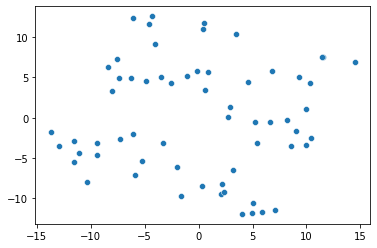

In [14]:
pc1_values = pcs_16S[:,0]
pc2_values = pcs_16S[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

#### Plot 18S PCA

<AxesSubplot:>

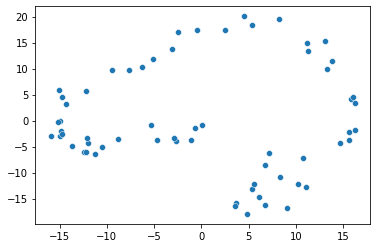

In [15]:
pc1_values = pcs_18S[:,0]
pc2_values = pcs_18S[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

## 03. Construct Bayesian model